In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # for image load and processing
import pandas as pd

from sklearn.cluster import KMeans

## Step - 01 : Load Image

In [2]:
# replace this path with your image path here in the imread
img = mpimg.imread("charmainder.png")

<b> imread : </b> it loads an image file into a Numpy array

* <b> Reture shape: </b>
    * Color RGB : (H, W, 3)
    * RGBA (has transparency alpha) : (H, W, 4)
    * Gray scale : (Height, Width)
 
* <b> Dtype & range (important)</b>
    * Often PNG -> `float32` in [0, 1] range
    * Often JPG -> `uint8` in [0, 255] range
    * (This behaviour can vary slightly by image/matplotlib version, so always check)
 
* <b>Color order</b> : RGB
* <b> No flags</b> (unlike openCV), It auto detects mode (RGB/RGBA/gray)

### preprocess

In [6]:
def preprocess_img(img):

    #--------------------Normalize image -------------------#
    if img.dtype == np.uint8:
        # normalize it bcoz unit8 format is in range [0, 255]
        img = img.astype(np.float32) / 255.0
    else:
        img = img.astype(np.float32)
        if img.max() > 1.0:
            # it is rare to have float32 and max val greater than 1, but just in case
            img = img / 255.0

    #-------------------handle alpha image ---------#
    if img.ndim == 3 and img.shape[-1] > 3:
        img = img[..., :3]
        # ... it means keep all preceding dimensions unchanged
        # :3 means on the last axis (i.e for the channels) selects indices (0, 1, 2) (first three channels only)

    # ---------------handling grayscale image ----------#
    elif img.ndim == 2:
        img = np.stack( [img, img, img], axis = -1 )
        # it means make 3 copies of same 2D array and stack them along a new last axis, thus creating (H, W, 3)

    return img

In [9]:
# preprocess
img = preprocess_img(img)

print("After : \nDtype : ", img.dtype, "\nrange : ", img.min(), img.max(), "\nshape: ", img.shape)

After : 
Dtype :  float32 
range :  0.0 1.0 
shape:  (1378, 1269, 3)


## Creating the compressed image
1. Flattening the image for kmeans
2. fitting the kMeans algo
3. compressing the image

In [14]:
def creating_compressed_image(img, k):
    # 01. flatting image for kmeans
    H, W, C = img.shape
    X = img.reshape(-1, 3)

    # 02. fit the k means algo
    kmeans = KMeans(
        n_clusters = k,
        random_state = 11, 
        n_init = 10
    )

    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_

    # compressing the image
    compressed = centroids[labels] # replace each pixel by its centroid color
    compressed = compressed.reshape(H, W, 3)

    return compressed

In [15]:
# Taking the k values (no. of clusters)
# k will represent the number of colors you want to limit you image to
# NOTE : LOWER THE K, MORE THE COMPRESSION FACTOR

k = int(input("Enter k (lower the k, higher the compression) : " ))

Enter k (lower the k, higher the compression) :  4


In [16]:
compressed = creating_compressed_image(img, k)

## 03. Displaying before / after compression

In [17]:
def display_images(img, compressed, k):
    plt.figure( figsize = (10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow( np.clip(compressed, 0, 1))  # means keep every value in `compressed` withing range [0, 1]
    plt.title(f"Compressed image , K = {k}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

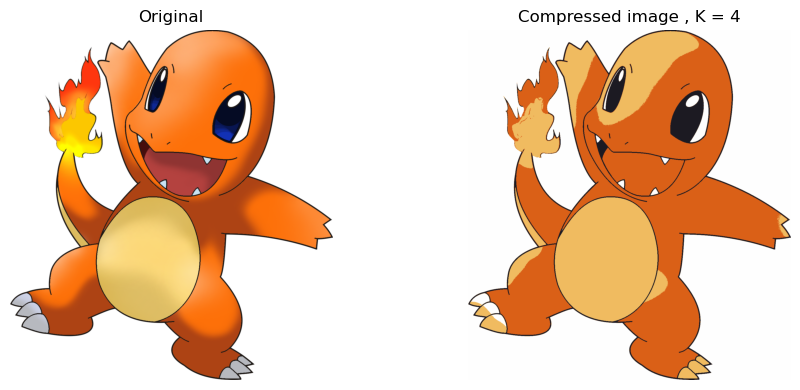

In [18]:
display_images(img, compressed, k)

## Save the compressed image
see the compression of size in the folder :)

In [22]:
def save_compressed_image(compressed, k):
    plt.imshow( np.clip (compressed, 0, 1) )
    plt.title(f"Compressed image, K = {k}")
    plt.axis("off")
    plt.savefig(f"compressed-image-{np.random.randint(1, 100)}")

Do you want to save the compressed image ? (y/n) :  y


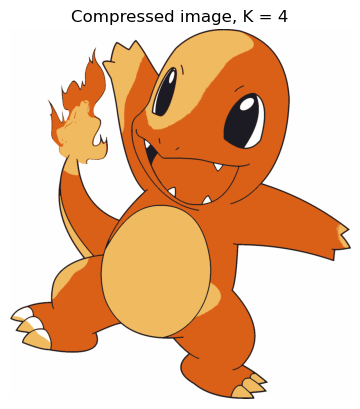

In [28]:
choice = input("Do you want to save the compressed image ? (y/n) : ").strip().lower()

if choice == 'y':
    save_compressed_image(compressed, k)
    print("Image saved ")
elif choice == 'n':
    print("No prob")
else:
    print("Wrong input ⚠️")